Size (sqft)		Price ($1000s)
800					150
1000				200
1200				250
1500				300
1800				350

In [1]:
import numpy as np
import pandas as pd		
import matplotlib.pyplot as plt
import seaborn as sns	
%matplotlib inline

In [2]:
# feature and target variables
x = np.array([800, 1000, 1200, 1500, 1800])
y = np.array([150, 200, 250, 300, 350])	

# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x.reshape(-1, 1))

In [5]:
X = (x - x.mean()) / x.std()

In [21]:
print(X)

[-1.29385109 -0.73130714 -0.16876319  0.67505274  1.51886867]


In [ ]:
# Initializing parameters
# m = slope, b = intercept	
m = 0
b = 0
learning_rate = 0.01	
n = len(X)
Epoch = 1000

In [13]:
def cost_function(X, y, m, b):
    predictions = m * X + b
    cost = (1/n) * np.sum((predictions - y)**2)
    return cost


In [23]:

cost_history = []

for i in range(Epoch):
    predictions = m * X + b
    error = predictions - y
    
    # Compute gradients
    dm = (2/n) * np.dot(error, X)
    db = (2/n) * np.sum(error)

    # Update parameters
    m -= learning_rate * dm
    b -= learning_rate * db

    # Save cost
    cost = cost_function(X, y, m, b)
    cost_history.append(cost)

    if i % 100 == 0:
        print(f"Epoch {i}: Cost = {cost:.4f}")


Epoch 0: Cost = 55.3797
Epoch 100: Cost = 55.3797
Epoch 200: Cost = 55.3797
Epoch 300: Cost = 55.3797
Epoch 400: Cost = 55.3797
Epoch 500: Cost = 55.3797
Epoch 600: Cost = 55.3797
Epoch 700: Cost = 55.3797
Epoch 800: Cost = 55.3797
Epoch 900: Cost = 55.3797


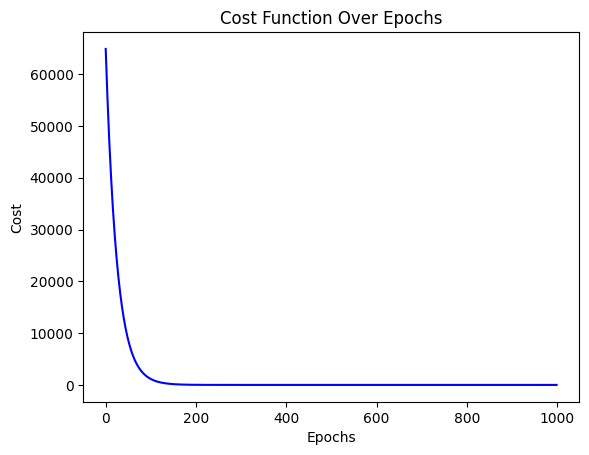

In [19]:
plt.plot(range(Epoch), cost_history, label='Cost Function', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Cost')	
plt.title('Cost Function Over Epochs')
plt.show()

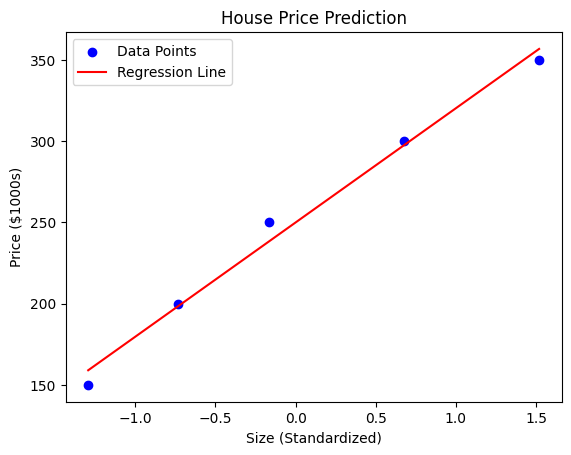

In [20]:
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, m * X + b, color='red', label='Regression Line')
plt.xlabel('Size (Standardized)')
plt.ylabel('Price ($1000s)')	
plt.title('House Price Prediction')
plt.legend()
plt.show()